In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity


In [2]:
# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
def mse(image1, image2):
	# Images must be of the same dimension
	error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
	error /= float(image1.shape[0] * image1.shape[1])

	return error

In [4]:
def compare(image1, image2):
    imshow(1, image1)
    imshow(2, image2)

    # Resize image2 to match image1 if shapes differ
    if image1.shape[:2] != image2.shape[:2]:
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Convert to grayscale
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate and print MSE and SSIM
    print('MSE = {:.2f}'.format(mse(image1, image2)))
    print('SS = {:.2f}'.format(structural_similarity(image1, image2)))


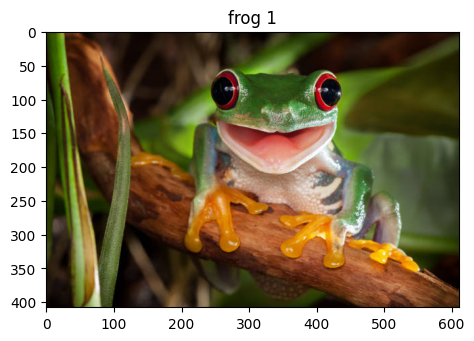

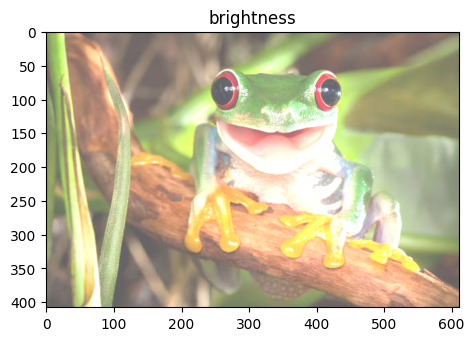

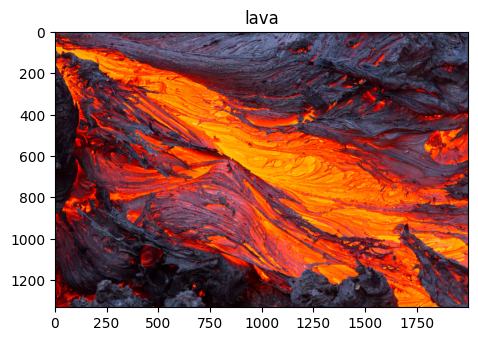

In [5]:
frog = cv2.imread(r'C:\Users\rhyth\Desktop\open_cv\Image Transformation and analysis\images\frog1.jpg')
lava=cv2.imread(r'C:\Users\rhyth\Desktop\open_cv\Image Transformation and analysis\images\lava.jpg')

M = np.ones(frog.shape, dtype = "uint8") * 100 
frogb = cv2.add(frog, M)

imshow("frog 1", frog)
imshow("brightness", frogb)
imshow("lava", lava)

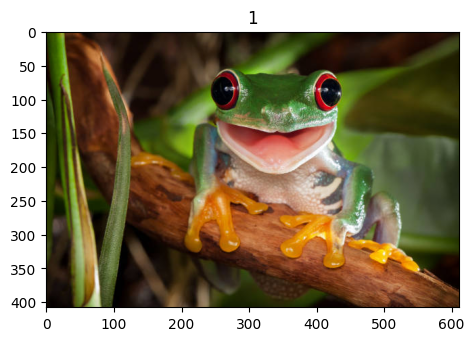

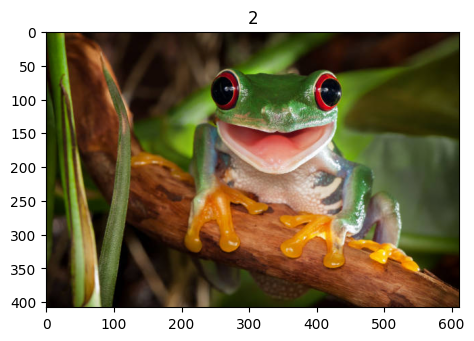

MSE = 0.00
SS = 1.00


In [6]:
compare(frog, frog)

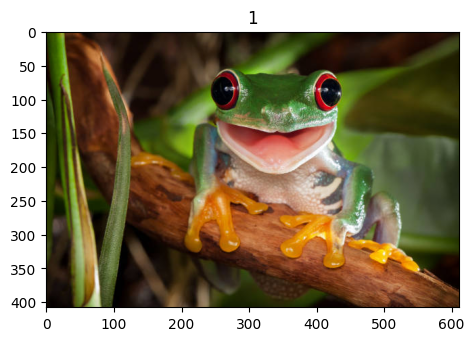

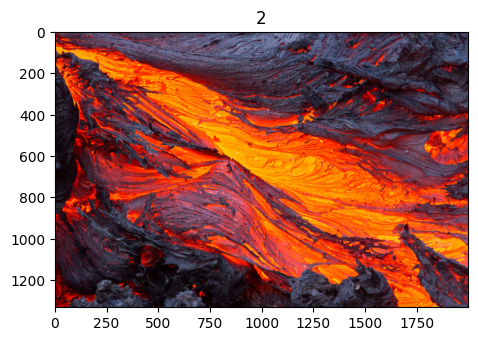

MSE = 2851.72
SS = 0.13


In [7]:
compare(frog, lava)

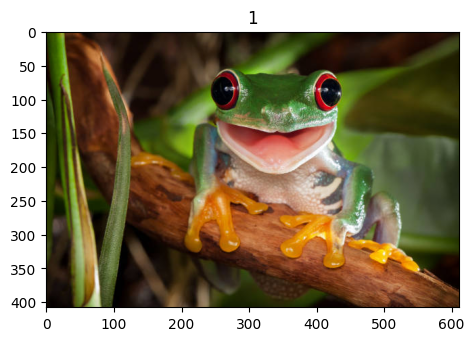

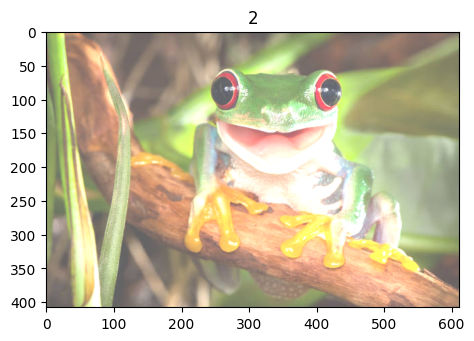

MSE = 9318.19
SS = 0.63


In [8]:
compare(frog, frogb)